<h1>Importing the dataset and printing first five items </h1>

In [1]:
import pandas as pd

df = pd.read_csv("cnn_data_4_5_-1076392975.csv")

In [2]:
df.head()

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020


<p>Looping through the body of the data set to get token words. To aviod stop words like "some", "it", "the", the STOPWORDS stores in wordcloud library was used. </p>

In [3]:
import re
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
word_dict = {}
for i in df["body"]:
    for j in i.split(" "):
        j = j.lower()
        j = re.sub('[^A-Za-z0-9]+', '', j)
        if j in word_dict.keys() and j not in stop_words:
            word_dict[j] = word_dict[j]+1
        else:
            word_dict[j] = 1
        
    

In [4]:
# Convert result dict to Dataframe
result_df = pd.DataFrame([word_dict])

In [5]:
result_df = result_df.T
result_df.reset_index(inplace = True)
result_df.columns = ["Word", "Count"]
result_df

,Word,Count
0,in,1
1,the,1
2,new,480
3,system,88
4,canton,1
...,...,...
14898,outperforming,1
14899,cuboulder,1
14900,comparative,1
14901,2010s,1


<p> Filtering the result even further</p>

In [6]:
#Removing Outliers
result_df = result_df[result_df["Count"]<1000]
#Sorting result in descending order
result_df.sort_values(by=['Count'], ascending=False, inplace = True)

/tmp/ipykernel_45545/3060973537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.sort_values(by=['Count'], ascending=False, inplace = True)


In [7]:
result_df.reset_index(inplace = True, drop = True)
result_df

,Word,Count
0,people,695
1,coronavirus,564
2,business,543
3,us,515
4,company,495
...,...,...
14895,absorbed,1
14896,workweeks,1
14897,fourday,1
14898,400member,1


In [8]:
# Getting our features and top 10 result
features = result_df.head(500)
top_10 = features.head(10)

Text(0, 0.5, 'Frequency')

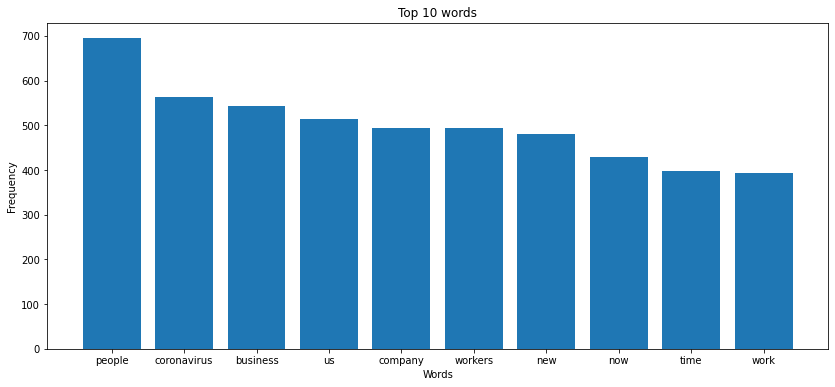

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.bar(top_10["Word"], top_10["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")
# plt.xticks(rotation=90)

Getting related pandemic terms

In [10]:
f = open("pandemic_092937.txt","r")
term = []
for x in f:
    for i in x.split():
        i = i.lower()
        i = re.sub('[^A-Za-z0-9]+', '', i)
        term.append(i)


In [11]:
#Getting words in term present in our features
test = features[features["Word"].isin(term) ]
test

,Word,Count
1,coronavirus,564
2,business,543
22,pandemic,289
50,social,199
132,covid19,113
134,distancing,111
186,emergency,92
187,spread,92
196,rate,91
230,national,83


Text(0, 0.5, 'Frequency')

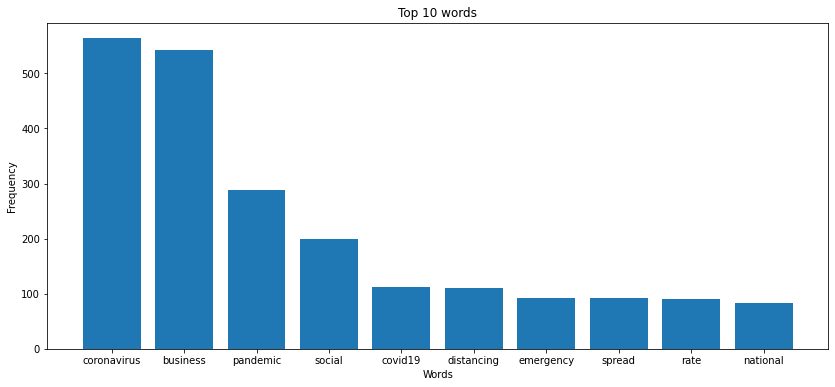

In [12]:

#plotting top ten result
top_ten = test.head(10)
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.bar(top_ten["Word"], top_ten["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [ ]:
fe